In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:100% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:14pt;}
div.output {font-size:14pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:14pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:14pt;padding:5px;}
table.dataframe{font-size:14px;}
</style>
"""))

In [2]:
from tensorflow.keras.utils import to_categorical  # (추천)분류분석시 원핫인코딩(1이 하나만) 2017년까지는 모든 데이터를 원핫이코딩... 
                                                   # 범주형 데이터를 컴퓨터가 이해할 수 있는 **숫자형 데이터(벡터)**로 변환하는 데 필수적인 전처리 기법
import pandas as pd  # 원핫인코딩(허접)
from tensorflow.keras.models import Sequential, load_model   # 모델생성, 모델load   
from tensorflow.keras.layers import Dense, Input
import numpy as np

# 딥러닝 : 데이터의 규칙성을 추출
- 응용분야 : 글씨인식, 문장분류, 예측, 질병진단, 얼굴인식
- ML/DL의 종류
    * 지도학습 (독립=입력변수, 타겟=종속변수) -정답이 있는 것
        * 분류분석(타겟변수가 category 변수인 분석, 다중분류 vs 이진분류) vs 회귀분석
    * 비지도학습(입력변수만 있는 경우)
        * 군집화
    * 강화학습(게임-알파고:경우의 수) 바둑의 20수 미리계산
- 지도학습에서의 딥러닝 프로그래밍 방식
    - 1. 데이터 확보 및 생성
    - 2. 데이터 전처리 : 스케일 조정, 훈련데이터셋(학습데이터셋), 검증데이터셋, 시험데이터셋
    - 3. 모델구성
    - 4. 모델 학습 과정 설정
    - 5. 모델 학습시키기(훈련, 검증데이터셋)
    - 6. 모델 평가(시험데이터셋)
    - 7. 모델 저장/사용(입력값이 주어지면 예측값을 받기)

# 1. 데이터셋 생성
# 2. 데이터 전처리

In [5]:
# 학습데이터 = 훈련데이터셋
x_train = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]*10)
y_train = np.array([2, 4, 6, 8,10,12,14,16,18]*10)   # 카테고리로
# 검증데이터, 시험데이터셋 (validation)
x_val  = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
y_val  = np.array([2, 4, 6, 8,10,12,14,16,18])

In [12]:
# 인코딩 종류 
    # 라벨인코딩=문자를 숫자로
    # 원핫인코딩=값의 개수만큼 열을 만들고, 해당범주에 해당한느 열에만 1을, 나머지는 0을
data = np.array(['a','b','c','b','b'])
print('원 데이터 :',data)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labeling_data = le.fit_transform(data)
print('라벨인코딩된 데이터 :',labeling_data)
# one_hot_encoding_data = to_categorical(data) : to_categorical함수에 문자데이터 넣으면 에러
one_hot_encoding_data = to_categorical(labeling_data)
print('원핫인코딩된 데이터 :\n',one_hot_encoding_data)

원 데이터 : ['a' 'b' 'c' 'b' 'b']
라벨인코딩된 데이터 : [0 1 2 1 1]
원핫인코딩된 데이터 :
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [14]:
# 원핫인코딩(분류분석을 위한 target변수) - 모두 0이고 내 카테고리만 1
data = np.array([1,4,5,4,5])
categorical_onehot = to_categorical(data)   # to_categorical(data) - 원핫인코딩결과가 numpy배열
print('to_categorical이용 \n', categorical_onehot)
getdummies_onehot = pd.get_dummies(data)   # pd.get_dummies(data) : 원핫인코딩결과가 DataFrame(data가 문자여도 가능)
print('get_dummies 이용\n', getdummies_onehot) 
print(type(categorical_onehot), type(getdummies_onehot))

to_categorical이용 
 [[0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]
get_dummies 이용
    1  4  5
0  1  0  0
1  0  1  0
2  0  0  1
3  0  1  0
4  0  0  1


In [18]:
getdummies_onehot

,1,4,5
0,1,0,0
1,0,1,0
2,0,0,1
3,0,1,0
4,0,0,1


In [19]:
# 분류분석을 위한 target변수 원핫인코딩
Y_train = to_categorical(y_train, 19)
Y_val   = to_categorical(y_val)

In [21]:
x_train.shape, Y_train.shape, x_val.shape, Y_val.shape

((90,), (90, 19), (9,), (9, 19))

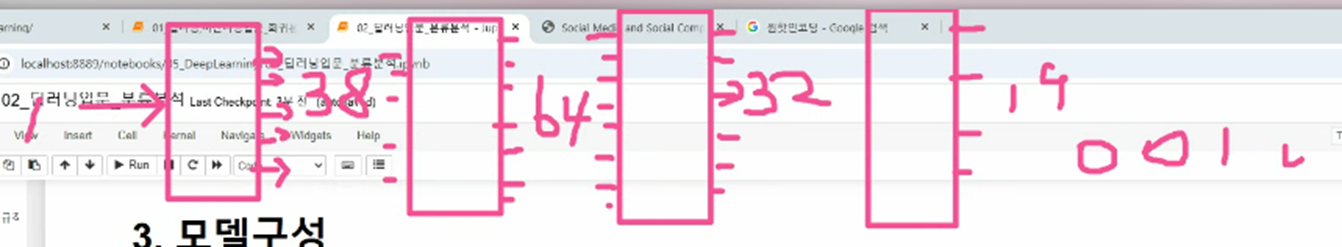

# 3. 모델구성

In [22]:
model = Sequential()
model.add(Input(shape=(1,)))   # 입력층
model.add(Dense(38, activation='sigmoid'))  # 활성화 함수 : relu, elu, tanh, sigmoid  
model.add(Dense(64, activation='elu'))
model.add(Dense(units=32, activation='elu'))
model.add(Dense(19, activation='softmax'))  # 출력층
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 38)                76        
                                                                 
 dense_1 (Dense)             (None, 64)                2496      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 19)                627       
                                                                 
Total params: 5,279
Trainable params: 5,279
Non-trainable params: 0
_________________________________________________________________


# 4. 모델 학습과정 설정
- 회귀분석에서의 loss : mse, rmse, mae
- 다중 분류분석에서의 loss : categorical_crossentropy
<img src="https://velog.velcdn.com/images%2Fwoooa%2Fpost%2F81461be3-3e94-4cc8-bd83-9277836ea50d%2Fimage.png" width="500">

In [23]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
# loss가 줄어드는 방향으로 학습을 하면서 얼만큼 정확도가 높아지게

# 5. 모델 학습시키기

In [24]:
hist = model.fit(x_train, Y_train, epochs=300, batch_size=10,  #  batch_size=10 : 한번에 10개씩
                 validation_data=(x_val, Y_val), verbose=2)
# verbose=0: 출력없음/ 1:기본값출력 / 2:에포크별 자세한 로그 출력

Epoch 1/300
9/9 - 1s - loss: 2.7700 - accuracy: 0.0667 - val_loss: 2.5784 - val_accuracy: 0.1111 - 565ms/epoch - 63ms/step
Epoch 2/300
9/9 - 0s - loss: 2.5253 - accuracy: 0.1111 - val_loss: 2.4317 - val_accuracy: 0.1111 - 30ms/epoch - 3ms/step
Epoch 3/300
9/9 - 0s - loss: 2.4070 - accuracy: 0.1111 - val_loss: 2.3368 - val_accuracy: 0.1111 - 30ms/epoch - 3ms/step
Epoch 4/300
9/9 - 0s - loss: 2.3133 - accuracy: 0.1111 - val_loss: 2.2597 - val_accuracy: 0.1111 - 33ms/epoch - 4ms/step
Epoch 5/300
9/9 - 0s - loss: 2.2370 - accuracy: 0.2667 - val_loss: 2.2006 - val_accuracy: 0.2222 - 30ms/epoch - 3ms/step
Epoch 6/300
9/9 - 0s - loss: 2.1895 - accuracy: 0.2667 - val_loss: 2.1511 - val_accuracy: 0.2222 - 29ms/epoch - 3ms/step
Epoch 7/300
9/9 - 0s - loss: 2.1424 - accuracy: 0.1667 - val_loss: 2.1049 - val_accuracy: 0.3333 - 29ms/epoch - 3ms/step
Epoch 8/300
9/9 - 0s - loss: 2.1095 - accuracy: 0.3111 - val_loss: 2.0657 - val_accuracy: 0.3333 - 59ms/epoch - 7ms/step
Epoch 9/300
9/9 - 0s - loss: 2

Epoch 69/300
9/9 - 0s - loss: 0.4146 - accuracy: 1.0000 - val_loss: 0.3872 - val_accuracy: 1.0000 - 27ms/epoch - 3ms/step
Epoch 70/300
9/9 - 0s - loss: 0.3941 - accuracy: 1.0000 - val_loss: 0.3780 - val_accuracy: 1.0000 - 31ms/epoch - 3ms/step
Epoch 71/300
9/9 - 0s - loss: 0.3761 - accuracy: 1.0000 - val_loss: 0.3649 - val_accuracy: 1.0000 - 31ms/epoch - 3ms/step
Epoch 72/300
9/9 - 0s - loss: 0.3679 - accuracy: 1.0000 - val_loss: 0.3535 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 73/300
9/9 - 0s - loss: 0.3616 - accuracy: 1.0000 - val_loss: 0.3446 - val_accuracy: 1.0000 - 32ms/epoch - 4ms/step
Epoch 74/300
9/9 - 0s - loss: 0.3544 - accuracy: 0.9667 - val_loss: 0.3392 - val_accuracy: 1.0000 - 31ms/epoch - 3ms/step
Epoch 75/300
9/9 - 0s - loss: 0.3438 - accuracy: 1.0000 - val_loss: 0.3272 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 76/300
9/9 - 0s - loss: 0.3280 - accuracy: 1.0000 - val_loss: 0.3178 - val_accuracy: 1.0000 - 28ms/epoch - 3ms/step
Epoch 77/300
9/9 - 0s - 

Epoch 136/300
9/9 - 0s - loss: 0.0596 - accuracy: 1.0000 - val_loss: 0.0556 - val_accuracy: 1.0000 - 33ms/epoch - 4ms/step
Epoch 137/300
9/9 - 0s - loss: 0.0576 - accuracy: 1.0000 - val_loss: 0.0516 - val_accuracy: 1.0000 - 32ms/epoch - 4ms/step
Epoch 138/300
9/9 - 0s - loss: 0.0513 - accuracy: 1.0000 - val_loss: 0.0500 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 139/300
9/9 - 0s - loss: 0.0507 - accuracy: 1.0000 - val_loss: 0.0485 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 140/300
9/9 - 0s - loss: 0.0483 - accuracy: 1.0000 - val_loss: 0.0472 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 141/300
9/9 - 0s - loss: 0.0476 - accuracy: 1.0000 - val_loss: 0.0463 - val_accuracy: 1.0000 - 31ms/epoch - 3ms/step
Epoch 142/300
9/9 - 0s - loss: 0.0466 - accuracy: 1.0000 - val_loss: 0.0447 - val_accuracy: 1.0000 - 31ms/epoch - 3ms/step
Epoch 143/300
9/9 - 0s - loss: 0.0446 - accuracy: 1.0000 - val_loss: 0.0434 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 144/300
9/

Epoch 203/300
9/9 - 0s - loss: 0.0119 - accuracy: 1.0000 - val_loss: 0.0117 - val_accuracy: 1.0000 - 32ms/epoch - 4ms/step
Epoch 204/300
9/9 - 0s - loss: 0.0118 - accuracy: 1.0000 - val_loss: 0.0115 - val_accuracy: 1.0000 - 32ms/epoch - 4ms/step
Epoch 205/300
9/9 - 0s - loss: 0.0116 - accuracy: 1.0000 - val_loss: 0.0113 - val_accuracy: 1.0000 - 32ms/epoch - 4ms/step
Epoch 206/300
9/9 - 0s - loss: 0.0113 - accuracy: 1.0000 - val_loss: 0.0111 - val_accuracy: 1.0000 - 32ms/epoch - 4ms/step
Epoch 207/300
9/9 - 0s - loss: 0.0111 - accuracy: 1.0000 - val_loss: 0.0109 - val_accuracy: 1.0000 - 32ms/epoch - 4ms/step
Epoch 208/300
9/9 - 0s - loss: 0.0109 - accuracy: 1.0000 - val_loss: 0.0107 - val_accuracy: 1.0000 - 34ms/epoch - 4ms/step
Epoch 209/300
9/9 - 0s - loss: 0.0108 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 210/300
9/9 - 0s - loss: 0.0106 - accuracy: 1.0000 - val_loss: 0.0104 - val_accuracy: 1.0000 - 31ms/epoch - 3ms/step
Epoch 211/300
9/

Epoch 270/300
9/9 - 0s - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000 - 28ms/epoch - 3ms/step
Epoch 271/300
9/9 - 0s - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 272/300
9/9 - 0s - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0043 - val_accuracy: 1.0000 - 31ms/epoch - 3ms/step
Epoch 273/300
9/9 - 0s - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0043 - val_accuracy: 1.0000 - 34ms/epoch - 4ms/step
Epoch 274/300
9/9 - 0s - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000 - 31ms/epoch - 3ms/step
Epoch 275/300
9/9 - 0s - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 276/300
9/9 - 0s - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000 - 28ms/epoch - 3ms/step
Epoch 277/300
9/9 - 0s - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000 - 34ms/epoch - 4ms/step
Epoch 278/300
9/

# 6. 모델 평가하기(모델 학습과정 살펴보고 evaluate()사용)

In [31]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

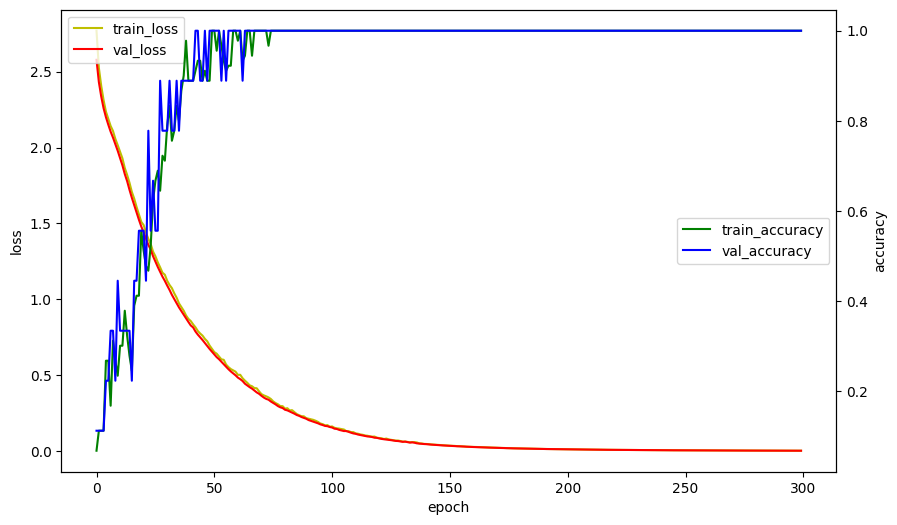

In [34]:
# 학습과정 표시하기
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,6))
loss_ax.plot(hist.history['loss'],'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'],'r', label='val_loss')
acc_ax = loss_ax.twinx()  # loss_ax와 x축을 공유하는 acc_ax생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train_accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val_accuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='center right')
plt.show()

In [38]:
# 모델 평가하기(테스트데이터셋으로 모델 학습 설정과정의 내용(loss, metrics))
score = model.evaluate(x_val, Y_val, batch_size=3)
print('loss :',score[0])
print('accuracy :',score[1])

3/3 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 1.0000
loss : 0.0031240161042660475
accuracy : 1.0


# 7. 모델 사용하기(모델을 이용해서 예측하기)

In [48]:
H = model.predict(np.array([2]))
H.argmax()

1/1 [==============================] - 0s 15ms/step


4

In [49]:
model.predict(np.array([2])).argmax()

1/1 [==============================] - 0s 16ms/step


4

In [47]:
# 몇 %의 확률로 4라고 예측했니?
H[0, H.argmax()] * 100

99.82560276985168

In [50]:
# 2,4,6의 확률
H[0,[2,4,6]]*100

array([7.5522341e-02, 9.9858055e+01, 6.6417776e-02], dtype=float32)

# 7. 모델 저장

In [51]:
model.save('model/02_deep.h5')

In [52]:
# 저장된 모델 사용하기
model1 = load_model('model/02_deep.h5')

In [53]:
model1.predict(np.array([[3]])).argmax()

1/1 [==============================] - 0s 45ms/step


6